In [1]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [61]:
from PIL import Image
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from scipy.cluster import vq
from scipy.misc import imresize

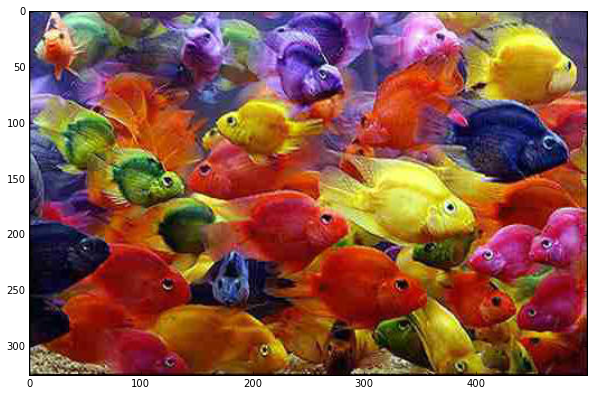

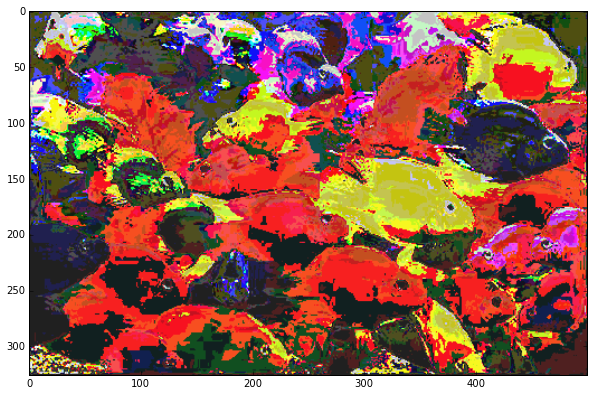

In [75]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
#import sklearn
from sklearn import cluster

n_clusters = 5
np.random.seed(0)

im = array(Image.open('fish.jpg'))
X = im.reshape((-1, 1))  # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

# create an array from labels and values
im_compressed = np.choose(labels, values)
im_compressed.shape = im.shape

vmin = im.min()
vmax = im.max()

# original lena
plt.figure(1, figsize=(10,10))
plt.imshow(im, cmap=plt.cm.gray, vmin=vmin, vmax=256)

# compressed lena
plt.figure(2, figsize=(10,10))
plt.imshow(im_compressed)#, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

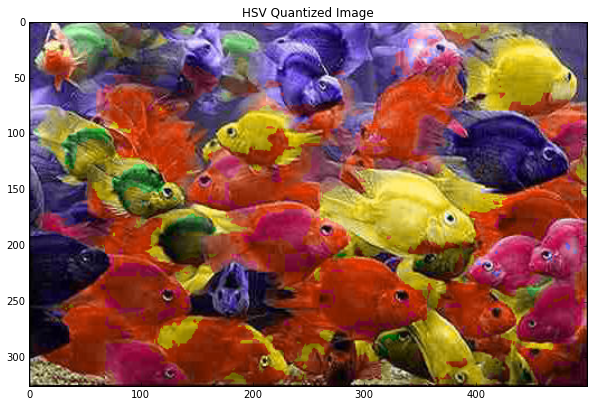

In [74]:
def quantizeHSV(origImg, k):
    hsv_img = matplotlib.colors.rgb_to_hsv(origImg)
    k_means_hue = cluster.KMeans(k)
    k_means_hue.fit(hsv_img[:,:,0].reshape((-1,1)))
    meanHues = k_means_hue.cluster_centers_.squeeze()
    labels = (k_means_hue.labels_).reshape((hsv_img.shape[0],hsv_img.shape[1]))
    h_out = (np.array([meanHues[labels[I]] for I in np.ndindex(labels.shape)])).reshape((hsv_img.shape[0],hsv_img.shape[1]))
    hsv = np.dstack((h_out,hsv_img[:,:,1],hsv_img[:,:,2]))
    outputImg = matplotlib.colors.hsv_to_rgb(hsv) 
    plt.figure(figsize=(10,10))
    plt.imshow(outputImg.astype('uint8'))
    plt.title('HSV Quantized Image')
    return outputImg,meanHues
im_hsv, meanHues = quantizeHSV(im, 5)

[[  89.17877197   70.21740723  107.96837616]
 [ 197.14338684  176.14682007   68.66244507]
 [ 158.77568054   56.77331161   25.27541924]
 [ 175.44128418  139.59048462  186.34922791]
 [  56.72822952   25.95128632   27.23569679]]
[4 4 4 ..., 4 4 4]


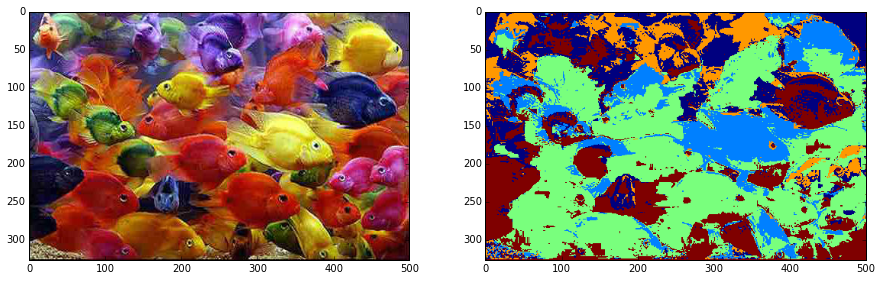

(326, 500, 3)


In [63]:
def quantizeRGB(origImg, k):

    features = []
    for x in range(im.shape[0]):
        for y in range(im.shape[1]):
            R = im[x,y,0]
            G = im[x,y,1]
            B = im[x,y,2]
            features.append([R,G,B])
    features = array(features,'f')

    centroids,variance = vq.kmeans2(features,k)
    print centroids
    code,distance = vq.vq(features,centroids)
    print code
    codeim = code.reshape(im.shape[0],im.shape[1])

    fig = plt.figure(figsize=(15,15))
    fig.add_subplot(1,2,1, title="")
    imshow(im)
    fig.add_subplot(1,2,2, title="")
    #codeim = imresize(codeim,im.shape[:2],interp='nearest')
    codeim = imresize(codeim,im.shape[:2])
    imshow(codeim.astype('uint8'))
    show()
    ret_im = np.array(im)
    ret_im[:,:,0] = codeim
    ret_im[:,:,1] = codeim
    ret_im[:,:,2] = codeim
    print ret_im.shape
    return ret_im, centroids
im = array(Image.open('fish.jpg'))
im_rgb, meanColors = quantizeRGB(im, 5)

In [51]:
print centroids

[[ 192.51307678  174.28242493   99.68148041]
 [ 248.06492615  247.75100708  245.68855286]
 [  33.1396904    31.4454689    32.06221008]]


im_hsv shape is  (326, 500, 3)
[[[  6.66666687e-01   1.00000000e+00   2.30000000e+01]
  [  7.02020168e-01   8.46153855e-01   3.90000000e+01]
  [  7.17054307e-01   9.77272749e-01   4.40000000e+01]
  ..., 
  [  6.86991870e-01   7.06896544e-01   5.80000000e+01]
  [  6.86991870e-01   7.73584902e-01   5.30000000e+01]
  [  6.66666687e-01   1.00000000e+00   3.60000000e+01]]

 [[  6.66666687e-01   7.64705896e-01   3.40000000e+01]
  [  7.00980425e-01   5.48387110e-01   6.20000000e+01]
  [  7.17054307e-01   5.58441579e-01   7.70000000e+01]
  ..., 
  [  6.86991870e-01   4.76744175e-01   8.60000000e+01]
  [  6.86991870e-01   5.61643839e-01   7.30000000e+01]
  [  6.86991870e-01   8.36734712e-01   4.90000000e+01]]

 [[  6.85185194e-01   5.62500000e-01   4.80000000e+01]
  [  7.14285672e-01   4.16666657e-01   8.40000000e+01]
  [  7.15909064e-01   4.19047624e-01   1.05000000e+02]
  ..., 
  [  6.86991870e-01   3.66071433e-01   1.12000000e+02]
  [  6.86991870e-01   4.45652187e-01   9.20000000e+01]
  [  6

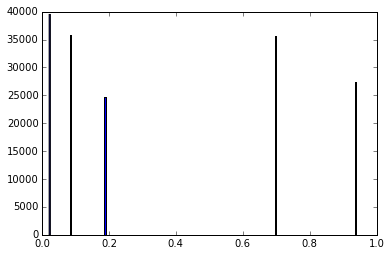

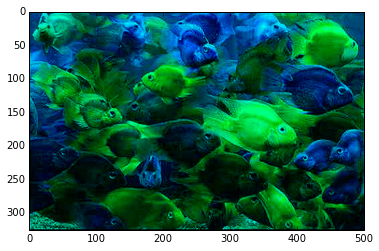

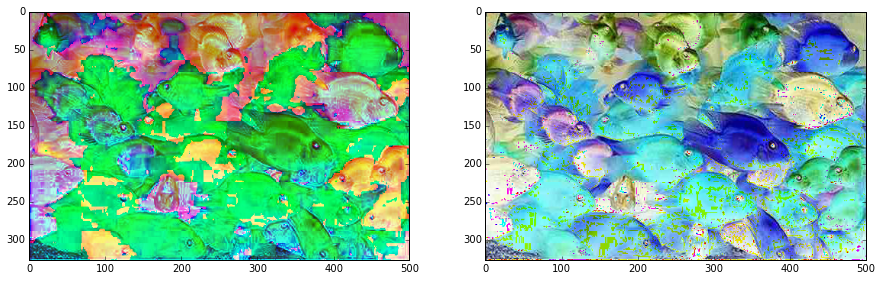

In [45]:
def quantizeHSV(origImg, k):
    im_hsv = matplotlib.colors.rgb_to_hsv(im)
    print "im_hsv shape is ", im_hsv.shape
    print im_hsv
    features = []
    for x in range(im.shape[0]):
        for y in range(im.shape[1]):
            hue = im[x,y,0]
            features.append([hue])
    features_temp = reshape(im_hsv,(im_hsv.shape[0]*im_hsv.shape[1],3))
    print features_temp.shape
    features = features_temp[:,0]
    print "feature shape is", features.shape
    # cluster
    codebook,variance = kmeans(features,k)
    print "codebook shape ", codebook.shape
    code,distance = vq(features,codebook)
    # create image with cluster labels
    print "code shape", code.shape

    res = codebook[code]
    res = reshape(res,(im_hsv.shape[0],im_hsv.shape[1]))
    print "res shape", res.shape
    print im
    print res

    lu=res.flatten()
    plt.hist(lu,256)
    plt.show()

    im[:,:,0] = res
    imshow(im)
    im_rgb = matplotlib.colors.hsv_to_rgb(im_hsv)
    fig = plt.figure(figsize=(15,15))
    fig.add_subplot(1,2,1, title="")
    imshow(im_hsv)
    fig.add_subplot(1,2,2, title="")
    #codeim = imresize(codeim,im.shape[:2],interp='nearest')
    imshow(im_rgb)
    show()
    return codeim, codebook
im = array(Image.open('fish.jpg'))
im_hsv, meanHues = quantizeHSV(im, 5)

In [46]:
def computeQuantizationError(origImg,quantizedImg):
    print origImg.shape
    print quantizedImg.shape
    return numpy.sum((origImg[:,:,0:3]-quantizedImg[:,:,0:3])**2)

im = array(Image.open('fish.jpg'))
print computeQuantizationError(im, im_rgb)

(326, 500, 3)
(326, 500, 3)
52005931


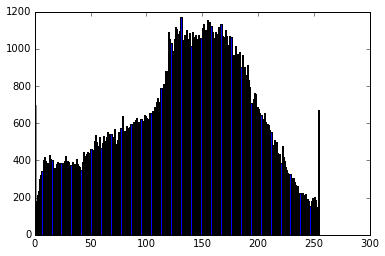

array([ 0, 13, 14, ..., 46, 36, 29], dtype=uint8)

In [76]:
def getHueHists(im, k):
    lu=im[...,0].flatten()
    plt.hist(lu,256)
    plt.show()
    return lu
getHueHists(im, 5)

((array([93125,  6341,  2076, 32574, 28884]),
  array([ 0.        ,  0.19982079,  0.39964159,  0.59946238,  0.79928317,
          0.99910396])),
 (array([27260, 59321, 35230,  4673, 36516]),
  array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ])))

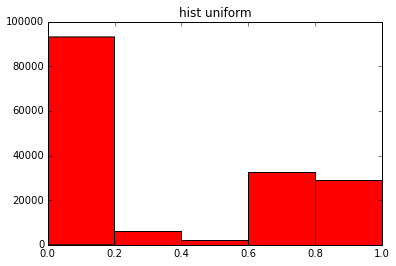

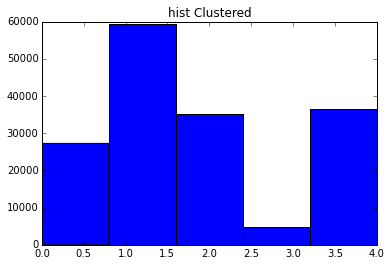

In [80]:
def getHueHists(origImg, k):
    hsv_img = matplotlib.colors.rgb_to_hsv(origImg)

    hist1 = np.histogram(hsv_img[:,:,0],k)

    k_means_hue = cluster.KMeans(k, n_init=4)
    k_means_hue.fit(hsv_img[:,:,0].reshape((-1,1)))

    meanHues = k_means_hue.cluster_centers_.squeeze()
    labels = (k_means_hue.labels_).reshape((hsv_img.shape[0],hsv_img.shape[1]))
    index_of_closestClust = np.zeros((hsv_img.shape[0],hsv_img.shape[1]))
    for i in range(hsv_img.shape[0]):
        for j in range(hsv_img.shape[1]):
            index_of_closestClust[i,j] = int(k_means_hue.predict(hsv_img[i,j,0]))
            #print "index ",index_of_closestClust[i,j]
    hist2 = np.histogram(index_of_closestClust.reshape(-1),k)
    plt.figure()
    plt.hist(hsv_img[:,:,0].reshape(-1), bins=k, color='red')
    plt.title('hist uniform')
    plt.figure()

    plt.hist(index_of_closestClust.reshape(-1), bins=k, color='blue')
    plt.title('hist Clustered')
    #plt.show()
    #print "the size of bincount is: ", hist2.shape 
    return hist1, hist2
getHueHists(im, 5)